<a href="https://colab.research.google.com/github/Krishabanker/Krishabanker/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Libraries**

In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Importing the Dataset**

In [143]:
dataset = pd.read_csv('train.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [144]:
#Checking dataset description
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning ( Removing corrupt or inaccurate records from a given set)**

In [145]:
#going to delete unnecessary columns(columns that we dont need further)
dataset.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis=True,inplace=True)

In [146]:
#view dataset after removing unnecessary columns
dataset


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [147]:
#now going to remove some outliers from dataset( outliers = 'An outlier is an observation that lies an abnormal distance from other values in a random sample from a population' )

dataset.quantile(1)     ##outliers at 100%

Survived      1.0000
Pclass        3.0000
Age          80.0000
SibSp         8.0000
Parch         6.0000
Fare        512.3292
Name: 1, dtype: float64

In [148]:
dataset.quantile(0.99)   ##outliers at 99%

Survived      1.00000
Pclass        3.00000
Age          65.87000
SibSp         5.00000
Parch         4.00000
Fare        249.00622
Name: 0.99, dtype: float64

**Work on missing value from dataset**

In [149]:
#From above we can see massive amount of outliers is from "Fare" column. So we going to clear outliers for batter dataset!
outlierFare =  dataset.Fare.quantile(1)
newDataset = dataset[dataset.Fare < outlierFare]
newDataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [150]:

newDataset= newDataset.fillna(newDataset.Age.mean())
newDataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

#now from above you can see that column "Age" does not have any missing values left!!


**Data Visualization**

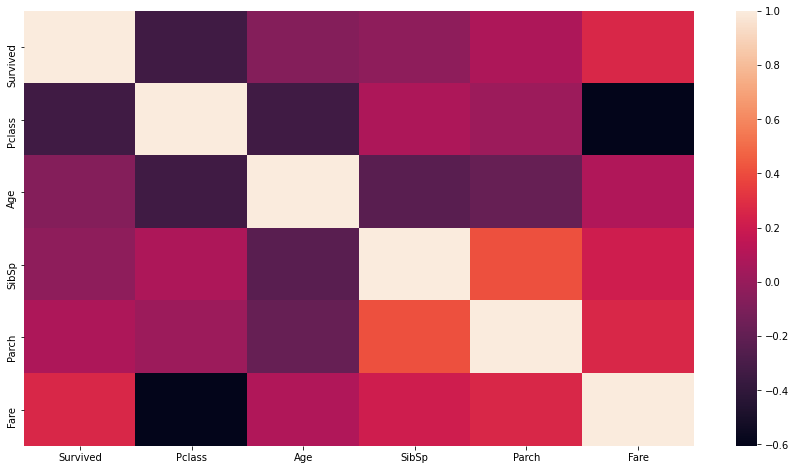

In [151]:
plt.figure(figsize=(15,8))
corr = newDataset.corr()
sns.heatmap(corr)

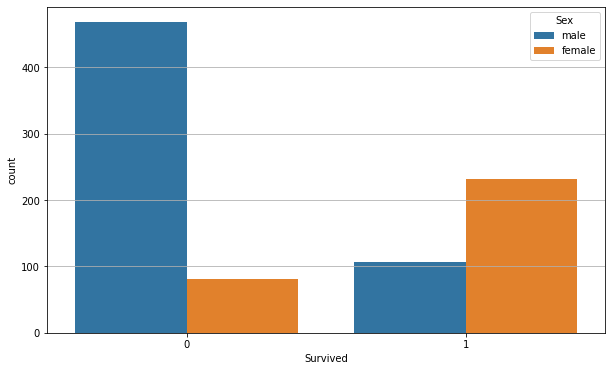

In [152]:
#Male & Female From The Survived Passenger's
passengers = newDataset['Sex']
survived = newDataset['Survived']
plt.figure(figsize=(10,6))
plt.grid()
sns.countplot(x = survived,hue=passengers)

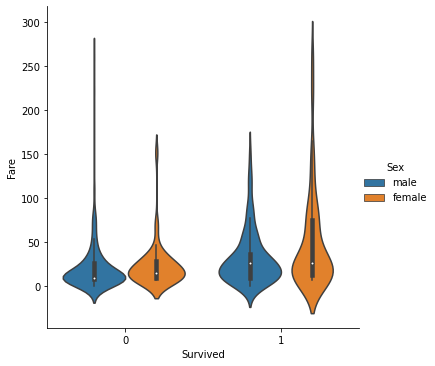

In [153]:
sns.catplot(data=newDataset,kind='violin',x="Survived",y="Fare",hue="Sex")

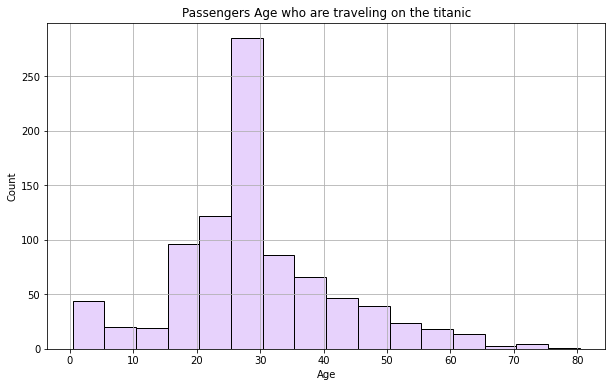

In [154]:
# N age of Passengers who are traveling on the titanic
plt.figure(figsize = (10,6))
plt.title("Passengers Age who are traveling on the titanic")
plt.grid()
sns.histplot(data = newDataset,x='Age',color='#E0C3FC',binwidth=5)

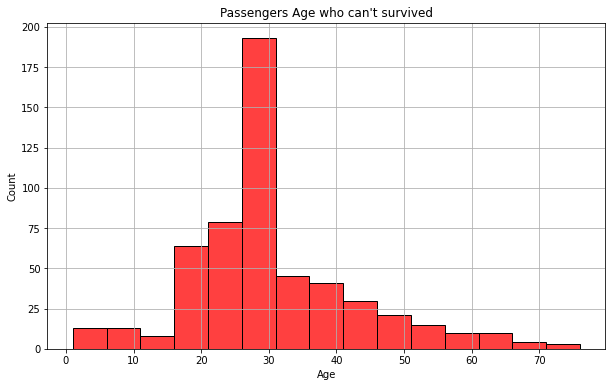

In [155]:
#So we can see from above chart that maximum age ratio is between 20 to 40

#Passengers who can't survived
plt.figure(figsize = (10,6))
plt.title("Passengers Age who can't survived")
plt.grid()
sns.histplot(x=newDataset.loc[newDataset['Survived'] == 0 ,'Age'],color='red',binwidth=5)

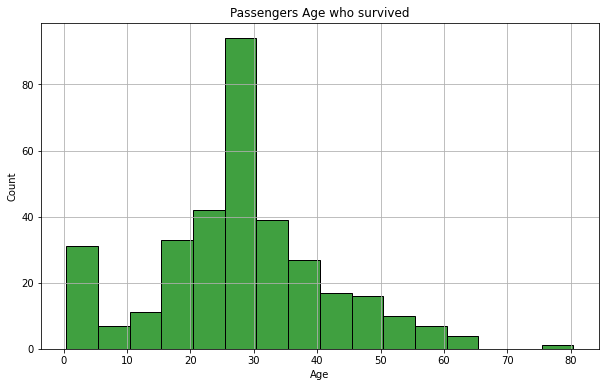

In [156]:
#Passengers are survived
plt.figure(figsize = (10,6))
plt.title("Passengers Age who survived")
plt.grid()
sns.histplot(x=newDataset.loc[newDataset['Survived'] == 1 ,'Age'],color='green',binwidth=5)

**Splitting dataset into x(Features) and y(Dependent Variable) set's for model training**

In [157]:
#Features 
x = newDataset.iloc[:,1:7].values
x

array([[3, 'male', 22.0, 1, 0, 7.25],
       [1, 'female', 38.0, 1, 0, 71.2833],
       [3, 'female', 26.0, 0, 0, 7.925],
       ...,
       [3, 'female', 29.67534458509142, 1, 2, 23.45],
       [1, 'male', 26.0, 0, 0, 30.0],
       [3, 'male', 32.0, 0, 0, 7.75]], dtype=object)

In [158]:
#Data Encoding on 'x' set!
##Here we are converting column 'Sex' into integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])



In [159]:
##Feature Scaling (make all values between '-3 , 3')
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)
x

array([[ 8.24122683e-01,  7.37799313e-01, -5.89844758e-01,
         4.30627490e-01, -4.73353361e-01, -5.66959029e-01],
       [-1.57529024e+00, -1.35538212e+00,  6.39743832e-01,
         4.30627490e-01, -4.73353361e-01,  9.89015696e-01],
       [ 8.24122683e-01, -1.35538212e+00, -2.82447610e-01,
        -4.75527039e-01, -4.73353361e-01, -5.50556892e-01],
       ...,
       [ 8.24122683e-01, -1.35538212e+00,  2.73023513e-16,
         4.30627490e-01,  2.00651558e+00, -1.73307748e-01],
       [-1.57529024e+00,  7.37799313e-01, -2.82447610e-01,
        -4.75527039e-01, -4.73353361e-01, -1.41462737e-02],
       [ 8.24122683e-01,  7.37799313e-01,  1.78648111e-01,
        -4.75527039e-01, -4.73353361e-01, -5.54809298e-01]])

In [160]:
#Dependent Variable
y = newDataset.iloc[:,0].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

**Training & Testing Our ModeL**


In [161]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(x,y)
y_test = classifier.predict(x)


In [162]:
#we going to use 'accuracy score' to find out accuracy of our model
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y,y_test))

0.9819819819819819


In [163]:
#here we going to use 'confusion matrix' to check our prediction
print(confusion_matrix(y,y_test))

[[547   2]
 [ 14 325]]


**Predicting Result On "test.csv" using Decision Tree model**

In [164]:
final_x = pd.read_csv("test.csv")

In [165]:
#going to delete unnecessary columns(columns that we dont need further)
final_x = final_x.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis=True)

In [166]:
#checking if dataset "final_x" have any missing values.
final_x.isnull().sum()

Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64

In [167]:
#from above you can see that "Age" column has "86" missing values and "Fare" have "1". 
#we need to fill that missing values by placing average values("using mean function")
final_x = final_x.fillna(final_x.Age.mean())
final_x.isnull().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [168]:
#Data Encoding on 'final_x' set!
##Here we are converting column 'Sex' into integer
final_x = final_x.values
final_x[:,1] = le.fit_transform(final_x[:,1])

##Feature Scaling (make all values between '-3 , 3')
final_x = ss.fit_transform(final_x)
final_x

array([[ 0.87348191,  0.75592895,  0.3349926 , -0.49947002, -0.4002477 ,
        -0.4981719 ],
       [ 0.87348191, -1.32287566,  1.32553003,  0.61699237, -0.4002477 ,
        -0.51303897],
       [-0.31581919,  0.75592895,  2.51417495, -0.49947002, -0.4002477 ,
        -0.46485367],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, -0.49947002, -0.4002477 ,
        -0.50855661],
       [ 0.87348191,  0.75592895,  0.        , -0.49947002, -0.4002477 ,
        -0.49421308],
       [ 0.87348191,  0.75592895,  0.        ,  0.61699237,  0.61989583,
        -0.23767369]])

In [169]:
final_pred = classifier.predict(final_x)
final_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [170]:
#preparing submission file's
final_X = pd.read_csv("test.csv")
submission = pd.DataFrame(columns = ['PassengerId','Survived'])
submission['PassengerId'] = final_X['PassengerId']
submission['Survived'] = final_pred


In [171]:
submission.to_csv("submission.csv",header=True,index=False)